In [88]:
import pandas as pd
import csv
import matplotlib as mlb
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy as sc
import numpy as nm
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, log_loss, accuracy_score

In [89]:
data = pd.read_csv('Carseats.csv', delimiter =',')
df = pd.DataFrame(data)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


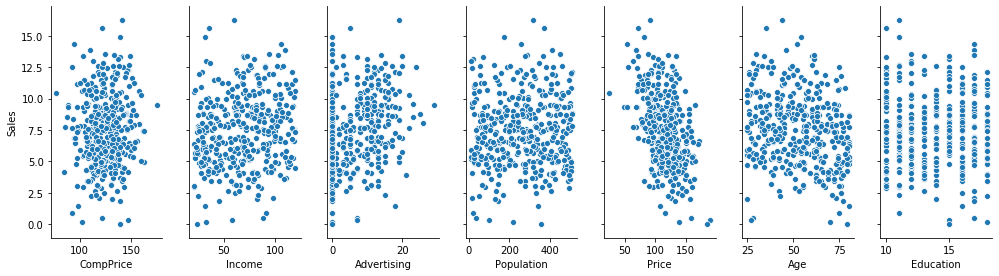

In [4]:
sb.pairplot(data, x_vars=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education'], y_vars='Sales', height=4, aspect=0.5)

In [90]:
x = data[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'Urban', 'US']]
y = data['Sales']

In [6]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,138,73,11,276,120,42,17,Yes,Yes
1,111,48,16,260,83,65,10,Yes,Yes
2,113,35,10,269,80,59,12,Yes,Yes
3,117,100,4,466,97,55,14,Yes,Yes
4,141,64,3,340,128,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,Yes,Yes
396,139,23,3,37,120,55,11,No,Yes
397,162,26,12,368,159,40,18,Yes,Yes
398,100,79,7,284,95,50,12,Yes,Yes


In [7]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [92]:
from sklearn.linear_model import LinearRegression

In [10]:
linreg = LinearRegression(fit_intercept=True)

In [93]:
import statsmodels.api as sm
from scipy import stats
x = data[['Price', 'Advertising', 'Urban', 'US']]
x2 = sm.add_constant(x_train)

In [12]:
x2

,const,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
32,1.0,107,32,12,236,137,64,10,No,Yes
258,1.0,108,38,0,251,81,72,14,No,No
87,1.0,131,67,7,272,126,54,16,No,Yes
170,1.0,128,39,12,356,118,71,10,Yes,Yes
130,1.0,94,84,13,497,77,51,12,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
249,1.0,125,67,0,86,117,65,11,Yes,No
60,1.0,122,102,19,469,123,29,13,Yes,Yes
388,1.0,135,89,11,245,78,79,16,Yes,Yes
95,1.0,134,25,10,237,148,59,13,Yes,Yes


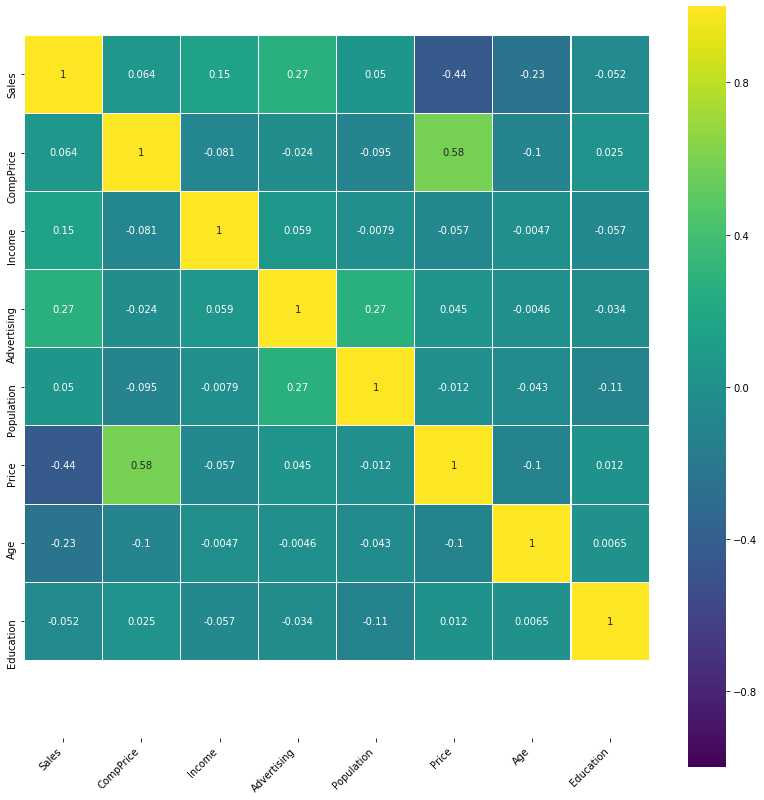

In [13]:
plt.figure(figsize=(14,14))
ax = sb.heatmap(df.corr(), vmin=-1, vmax=1, center=0, annot=True, linewidths=0.1, cmap="viridis", square="True")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylim(9, 0)
plt.show()

In [14]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [94]:
import statsmodels.api as sm
from scipy import stats
x2 = sm.add_constant(x_train)

In [16]:
x2

,const,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
32,1.0,107,32,12,236,137,64,10,No,Yes
258,1.0,108,38,0,251,81,72,14,No,No
87,1.0,131,67,7,272,126,54,16,No,Yes
170,1.0,128,39,12,356,118,71,10,Yes,Yes
130,1.0,94,84,13,497,77,51,12,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
249,1.0,125,67,0,86,117,65,11,Yes,No
60,1.0,122,102,19,469,123,29,13,Yes,Yes
388,1.0,135,89,11,245,78,79,16,Yes,Yes
95,1.0,134,25,10,237,148,59,13,Yes,Yes


In [17]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [18]:
df.drop_duplicates(inplace = True)

In [19]:
df.shape

(400, 11)

In [20]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [21]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [112]:
df.loc[(df['US'] == 'Yes'), 'US'] = 1
df.loc[(df['US'] == 'No'), 'US'] = 0

In [113]:
df.loc[(df['Urban'] == 'Yes'), 'Urban'] = 1
df.loc[(df['Urban'] == 'No'), 'Urban'] = 0

In [114]:
x = data[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'Urban', 'US']]
y = data['Sales']

In [115]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [117]:
x_train

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
170,128,39,12,356,118,71,10,1,1
126,153,68,2,60,133,59,16,1,1
348,132,102,20,459,107,49,11,1,1
59,118,71,4,148,114,80,13,1,0
205,113,22,1,317,132,28,12,1,0
...,...,...,...,...,...,...,...,...,...
387,142,73,14,238,115,73,14,0,1
378,133,88,3,105,119,79,12,1,1
264,128,29,5,324,159,31,15,1,1
19,129,76,16,58,121,69,12,1,1


In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
linreg = LinearRegression(fit_intercept=True)

In [137]:
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
print(linreg.intercept_)
print(linreg.coef_)

7.681496014919813
[ 0.10051552  0.00981647  0.12276673  0.00036691 -0.0932173  -0.04434834
 -0.07249102 -0.29169045  0.1676305 ]


In [124]:
import statsmodels.api as sm
from scipy import stats
x = data[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'Urban', 'US']]
x2 = sm.add_constant(x_train)
est = sm.OLS(y_train, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     42.31
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           6.09e-49
Time:                        23:56:07   Log-Likelihood:                -656.83
No. Observations:                 320   AIC:                             1334.
Df Residuals:                     310   BIC:                             1371.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.6815      1.247      6.158      

C:\Users\kumar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [126]:
y_pred = linreg.predict(x_test)

In [127]:
x_test.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
308,126,80,19,436,126,52,10,1,1
254,108,104,23,353,129,37,17,1,1
282,150,96,0,80,154,61,11,1,0
399,134,37,0,27,120,49,16,1,1
143,122,88,7,36,159,28,17,1,1


In [128]:
y_pred

array([ 8.723845  ,  7.48891057,  5.58075338,  6.88063088,  4.26110315,
        7.49052083,  5.23145613,  6.81840721,  8.88299085, 10.03131746,
        7.18866354,  6.64710091,  7.85150435,  9.29940924, 10.1833822 ,
       10.30311614,  7.57613219,  8.18463371,  6.49789105,  8.96714757,
        6.41115313,  5.93594776, 13.44400431,  5.84672751,  8.23934153,
        6.69643536,  2.05928188, 10.98607341,  4.68101915, 10.0565396 ,
        7.78384863,  3.65401521,  7.80407845,  8.7961753 , 11.87142805,
        6.79429163, 10.80526593,  5.27424903,  7.51874377,  4.31654599,
        4.98650068,  9.76132208,  9.5418586 ,  8.13342243,  5.11831548,
        8.25082378,  7.3496327 ,  7.29631247,  7.68747614, 12.28606528,
        4.5664542 ,  6.08827836,  6.41465349,  8.12436211,  8.66551518,
        8.20221478,  4.84541759,  5.79242057,  8.56403312,  7.51366517,
        4.97933278,  7.83926736,  6.25526681,  5.67873406,  9.1151528 ,
        6.22112525, 10.29006964,  8.31101018,  3.86476745,  7.01

In [129]:
y_test

308    9.24
254    9.58
282    7.74
399    9.71
143    0.53
       ... 
116    5.08
44     4.16
52     7.91
97     7.45
224    4.10
Name: Sales, Length: 80, dtype: float64

In [130]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

1.68713493847607


In [132]:
y_train_pred = linreg.predict(x_train)
print(metrics.mean_absolute_error(y_train, y_train_pred))

1.5046013310081296


In [133]:
print("Test MSE:", metrics.mean_squared_error(y_test, y_pred))
print("Training MSE:",metrics.mean_squared_error(y_train, y_train_pred))

Test MSE: 4.2160626466963205
Training MSE: 3.551239954719821


In [24]:
data = pd.read_csv('Carseats.csv', delimiter =',')
df = pd.DataFrame(data)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [25]:
df.ShelveLoc = pd.Categorical(df.ShelveLoc, ['Bad', 'Medium', 'Good'], ordered = True)

In [26]:
df.ShelveLoc

0         Bad
1        Good
2      Medium
3      Medium
4         Bad
        ...  
395      Good
396    Medium
397    Medium
398       Bad
399      Good
Name: ShelveLoc, Length: 400, dtype: category
Categories (3, object): [Bad < Medium < Good]

In [27]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [28]:
df.ShelveLoc=df.ShelveLoc.cat.codes

In [29]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,Yes,Yes
1,11.22,111,48,16,260,83,2,65,10,Yes,Yes
2,10.06,113,35,10,269,80,1,59,12,Yes,Yes
3,7.40,117,100,4,466,97,1,55,14,Yes,Yes
4,4.15,141,64,3,340,128,0,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,Yes,Yes
396,6.14,139,23,3,37,120,1,55,11,No,Yes
397,7.41,162,26,12,368,159,1,40,18,Yes,Yes
398,5.94,100,79,7,284,95,0,50,12,Yes,Yes


In [30]:
df.loc[(df['US'] == 'Yes'), 'US'] = 1
df.loc[(df['US'] == 'No'), 'US'] = 0

In [31]:
df.loc[(df['Urban'] == 'Yes'), 'Urban'] = 1
df.loc[(df['Urban'] == 'No'), 'Urban'] = 0

In [153]:
data.describe()

KeyError: "None of [Index(['min', 'max'], dtype='object')] are in the [columns]"

In [33]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,1,55,11,0,1
397,7.41,162,26,12,368,159,1,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [34]:
import statsmodels.api as sm
from scipy import stats
x = data[['Price', 'Advertising', 'Urban', 'US']]
x2 = sm.add_constant(x_train)

C:\Users\kumar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [35]:
x2

,const,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
32,1.0,107,32,12,236,137,64,10,No,Yes
258,1.0,108,38,0,251,81,72,14,No,No
87,1.0,131,67,7,272,126,54,16,No,Yes
170,1.0,128,39,12,356,118,71,10,Yes,Yes
130,1.0,94,84,13,497,77,51,12,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
249,1.0,125,67,0,86,117,65,11,Yes,No
60,1.0,122,102,19,469,123,29,13,Yes,Yes
388,1.0,135,89,11,245,78,79,16,Yes,Yes
95,1.0,134,25,10,237,148,59,13,Yes,Yes


In [36]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,1,55,11,0,1
397,7.41,162,26,12,368,159,1,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [37]:
import statsmodels.api as sm
from scipy import stats
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     38.77
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           2.21e-27
Time:                        22:43:01   Log-Likelihood:                -916.11
No. Observations:                 400   AIC:                             1842.
Df Residuals:                     395   BIC:                             1862.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0113      0.633     20.544      

In [100]:
y_train

178    10.66
187     6.03
293    11.28
102     5.30
35     11.07
       ...  
212    12.04
344     8.43
280     2.86
199     6.42
271     4.55
Name: Sales, Length: 320, dtype: float64

In [101]:
x_train

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
178,104,71,14,89,81,25,14,No,Yes
187,117,32,0,142,96,62,17,Yes,No
293,123,84,0,74,89,59,10,Yes,No
102,113,22,0,57,97,65,16,No,No
35,131,84,11,29,96,44,17,No,Yes
...,...,...,...,...,...,...,...,...,...
212,145,69,19,501,105,45,11,Yes,Yes
344,138,80,0,108,126,70,13,No,Yes
280,121,86,10,496,145,51,10,Yes,Yes
199,122,88,5,335,126,64,14,Yes,Yes


In [102]:
x2

,const,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
178,1.0,104,71,14,89,81,25,14,No,Yes
187,1.0,117,32,0,142,96,62,17,Yes,No
293,1.0,123,84,0,74,89,59,10,Yes,No
102,1.0,113,22,0,57,97,65,16,No,No
35,1.0,131,84,11,29,96,44,17,No,Yes
...,...,...,...,...,...,...,...,...,...,...
212,1.0,145,69,19,501,105,45,11,Yes,Yes
344,1.0,138,80,0,108,126,70,13,No,Yes
280,1.0,121,86,10,496,145,51,10,Yes,Yes
199,1.0,122,88,5,335,126,64,14,Yes,Yes


In [104]:
lr = LinearRegression()

In [106]:
x_train

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
178,104,71,14,89,81,25,14,No,Yes
187,117,32,0,142,96,62,17,Yes,No
293,123,84,0,74,89,59,10,Yes,No
102,113,22,0,57,97,65,16,No,No
35,131,84,11,29,96,44,17,No,Yes
...,...,...,...,...,...,...,...,...,...
212,145,69,19,501,105,45,11,Yes,Yes
344,138,80,0,108,126,70,13,No,Yes
280,121,86,10,496,145,51,10,Yes,Yes
199,122,88,5,335,126,64,14,Yes,Yes


In [107]:
y_train

178    10.66
187     6.03
293    11.28
102     5.30
35     11.07
       ...  
212    12.04
344     8.43
280     2.86
199     6.42
271     4.55
Name: Sales, Length: 320, dtype: float64

In [38]:
print(est2.bse)
print(est2.params)
est2.conf_int(alpha=0.05, cols=None)

const          0.633326
Price          0.005099
Advertising    0.024837
Urban          0.264279
US             0.345060
dtype: float64
const          13.011278
Price          -0.054612
Advertising     0.120333
Urban          -0.038790
US              0.058514
dtype: float64


,0,1
const,11.766167,14.256389
Price,-0.064637,-0.044587
Advertising,0.071503,0.169164
Urban,-0.558358,0.480779
US,-0.619870,0.736897


In [39]:
import math
v = est2.mse_resid
sd = math.sqrt(v)
print(sd)

2.405188679567202


In [40]:
import statsmodels.api as sm
from scipy import stats
x = data[['Price', 'Advertising']]
x2 = sm.add_constant(x_train)

In [41]:
import statsmodels.api as sm
from scipy import stats
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     77.91
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           2.87e-29
Time:                        22:43:01   Log-Likelihood:                -916.14
No. Observations:                 400   AIC:                             1838.
Df Residuals:                     397   BIC:                             1850.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0034      0.607     21.428      

In [154]:
data = pd.read_csv('ToyotaCorolla.csv', delimiter =',')
df = pd.DataFrame(data)
df

,Price,Age,Mileage,Horsepower,MetColor,Automatic,Displacement,Doors,Weight,FuelType
0,16605,23,29196,90,1,0,122,3,2568,Diesel
1,16913,23,45321,90,1,0,122,3,2568,Diesel
2,17159,24,25918,90,1,0,122,3,2568,Diesel
3,18389,26,29826,90,0,0,122,3,2568,Diesel
4,16913,30,23923,90,0,0,122,3,2579,Diesel
...,...,...,...,...,...,...,...,...,...,...
1431,9225,69,12765,86,1,0,79,3,2260,Petrol
1432,13339,72,11806,86,0,0,79,3,2238,Petrol
1433,10455,71,10573,86,0,0,79,3,2238,Petrol
1434,8918,70,10511,86,1,0,79,3,2238,Petrol


In [79]:
df.shape

(1436, 10)

In [160]:
data.describe()

,Price,Age,Mileage,Horsepower,MetColor,Automatic,Displacement,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,13199.266017,55.947075,42584.589136,101.502089,0.674791,0.055710,95.720752,4.033426,2364.442897
std,4461.162081,18.599988,23305.402480,14.981080,0.468616,0.229441,11.587120,0.952677,115.945453
min,5351.000000,1.000000,1.000000,69.000000,0.000000,0.000000,79.000000,2.000000,2205.000000
25%,10394.000000,44.000000,26719.000000,90.000000,0.000000,0.000000,85.000000,3.000000,2293.000000
50%,12177.000000,61.000000,39388.500000,110.000000,1.000000,0.000000,98.000000,4.000000,2359.000000
75%,14699.000000,70.000000,54072.000000,110.000000,1.000000,0.000000,98.000000,5.000000,2392.000000
max,39975.000000,80.000000,150993.000000,192.000000,1.000000,1.000000,122.000000,5.000000,3560.000000


(9, 0)

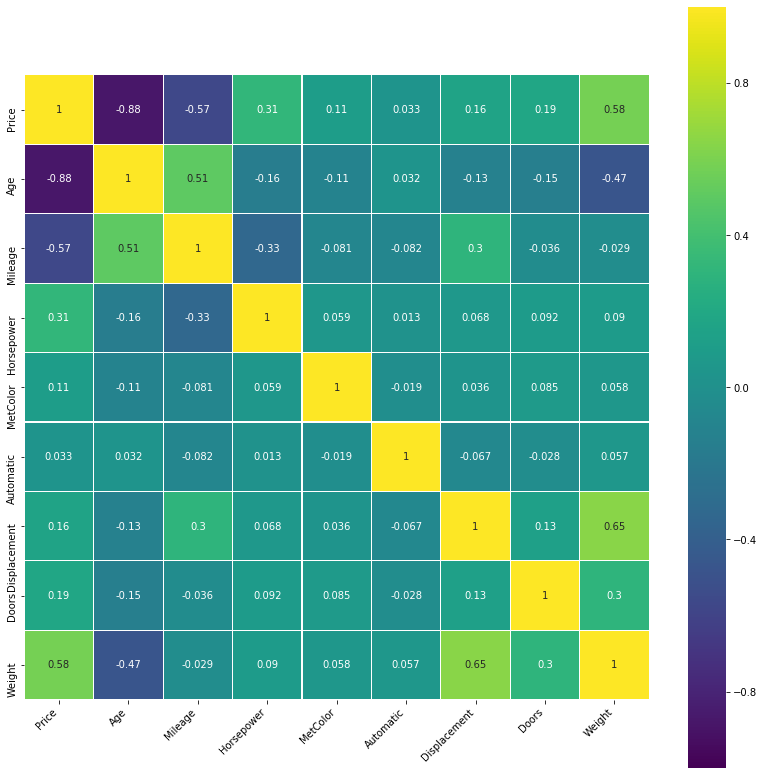

In [45]:
plt.figure(figsize=(14,14))
ax = sb.heatmap(df.corr(), vmin=-1, vmax=1, center=0, annot=True, linewidths=0.1, cmap="viridis", square="True")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylim(9, 0)

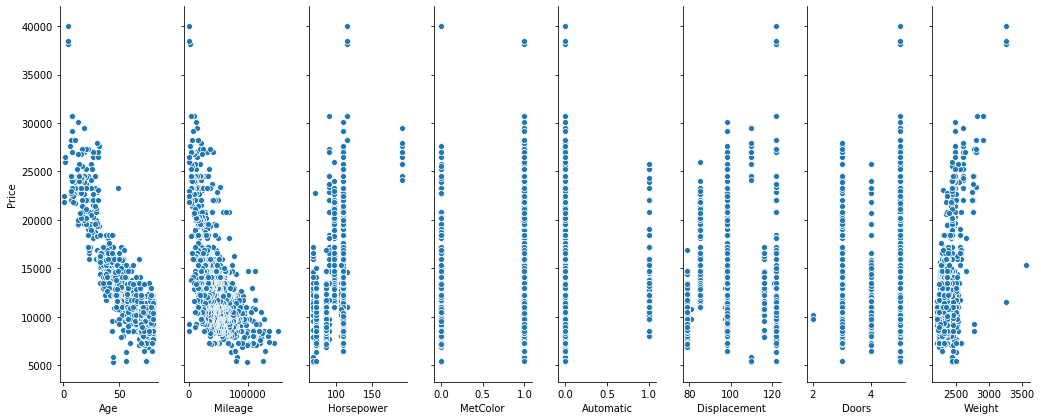

In [46]:
sb.pairplot(data, x_vars=['Age', 'Mileage', 'Horsepower', 'MetColor', 'Automatic','Displacement', 'Doors', 'Weight'], y_vars='Price', height=6, aspect=0.3, diag_kind="reg")

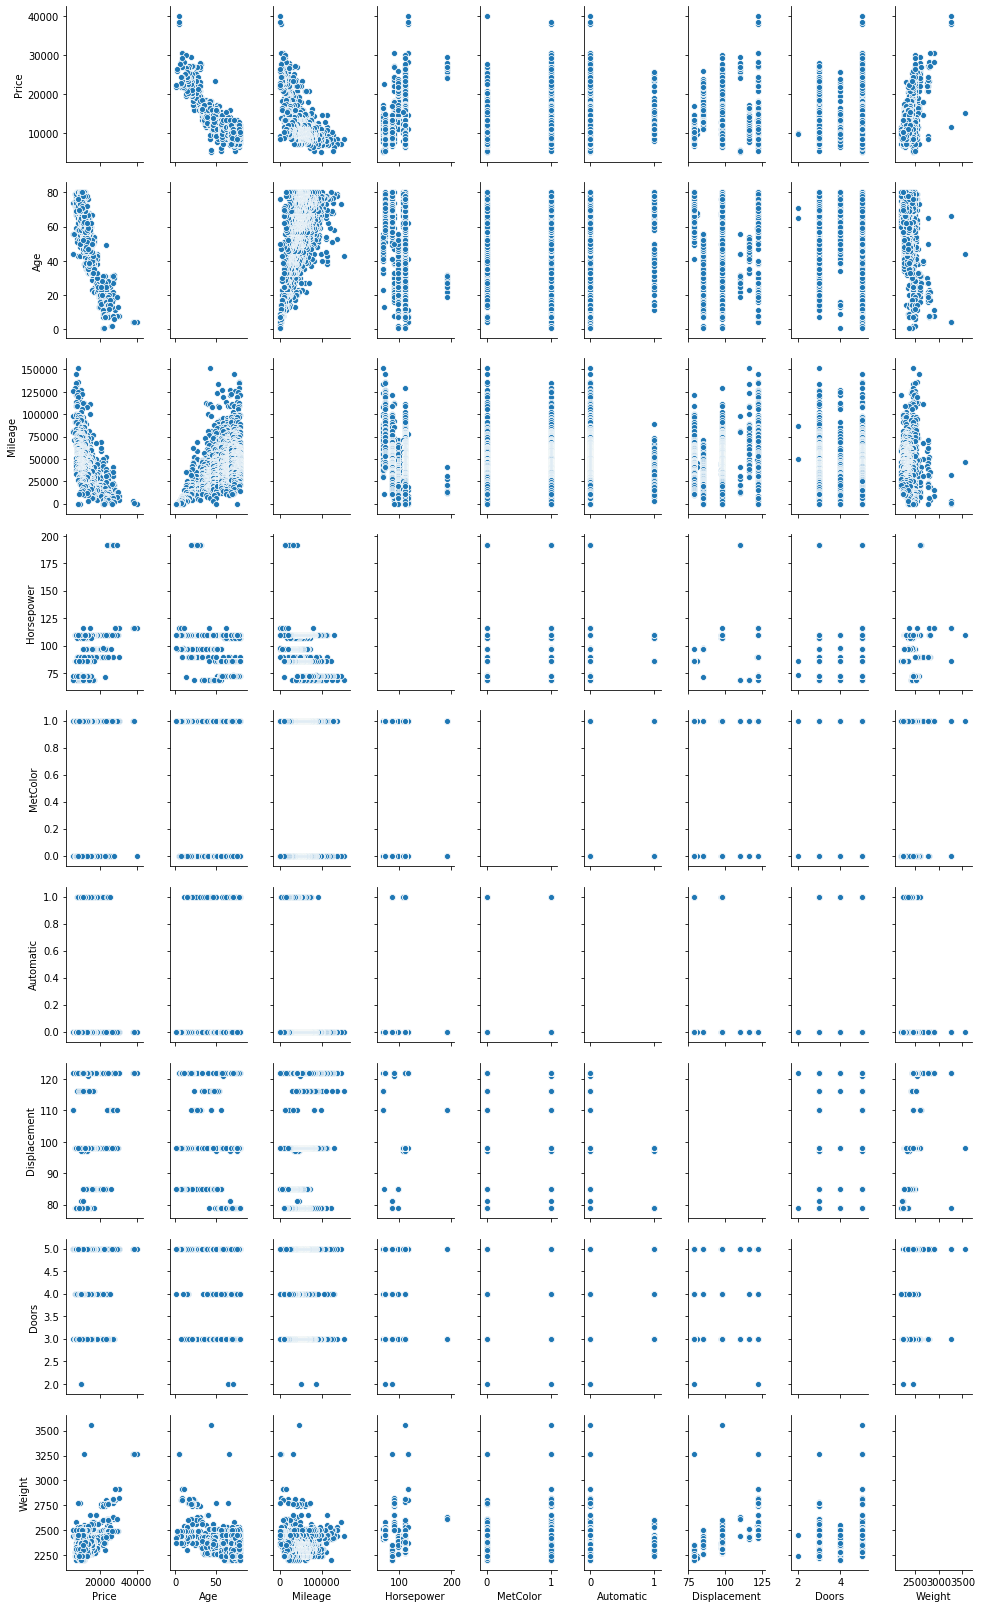

In [47]:
sb.pairplot(data, diag_kind="scatter", aspect=0.6)

In [48]:
df.dtypes

Price            int64
Age              int64
Mileage          int64
Horsepower       int64
MetColor         int64
Automatic        int64
Displacement     int64
Doors            int64
Weight           int64
FuelType        object
dtype: object

In [49]:
df

,Price,Age,Mileage,Horsepower,MetColor,Automatic,Displacement,Doors,Weight,FuelType
0,16605,23,29196,90,1,0,122,3,2568,Diesel
1,16913,23,45321,90,1,0,122,3,2568,Diesel
2,17159,24,25918,90,1,0,122,3,2568,Diesel
3,18389,26,29826,90,0,0,122,3,2568,Diesel
4,16913,30,23923,90,0,0,122,3,2579,Diesel
...,...,...,...,...,...,...,...,...,...,...
1431,9225,69,12765,86,1,0,79,3,2260,Petrol
1432,13339,72,11806,86,0,0,79,3,2238,Petrol
1433,10455,71,10573,86,0,0,79,3,2238,Petrol
1434,8918,70,10511,86,1,0,79,3,2238,Petrol


In [80]:
x = data[['Age']]
y = data['Price']

In [51]:
x

,Age
0,23
1,23
2,24
3,26
4,30
...,...
1431,69
1432,72
1433,71
1434,70


In [52]:
y

0       16605
1       16913
2       17159
3       18389
4       16913
        ...  
1431     9225
1432    13339
1433    10455
1434     8918
1435     8549
Name: Price, Length: 1436, dtype: int64

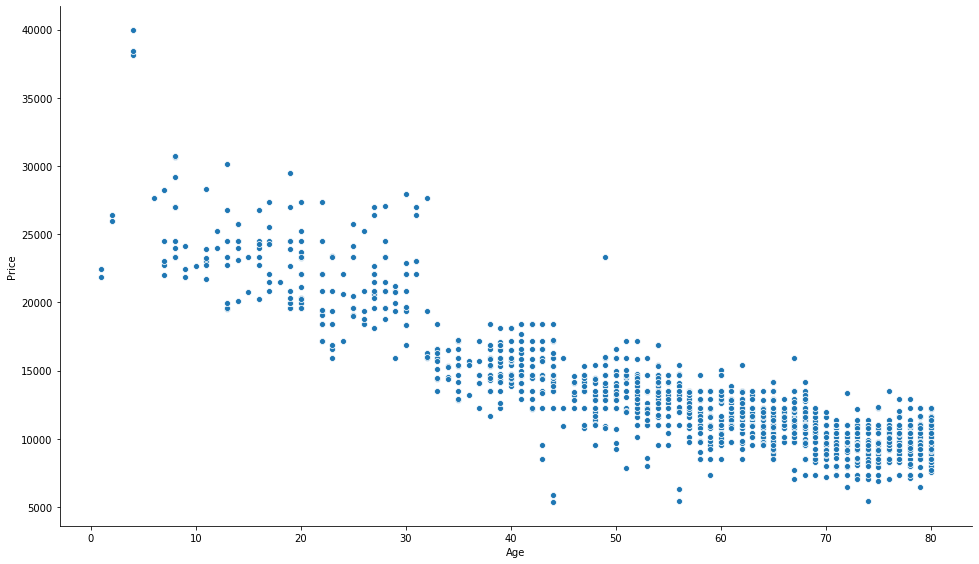

In [53]:
sb.pairplot(data, x_vars=['Age'], y_vars='Price', height=8, aspect=1.7, diag_kind="reg")

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
linreg = LinearRegression(fit_intercept=True)

In [84]:
import statsmodels.api as sm
from scipy import stats
x2 = sm.add_constant(x_train)
x2

,const,Age
1103,1.0,74
284,1.0,41
609,1.0,67
719,1.0,68
829,1.0,58
...,...,...
583,1.0,46
445,1.0,50
1017,1.0,68
271,1.0,38


In [85]:
df.isnull().sum()

Price           0
Age             0
Mileage         0
Horsepower      0
MetColor        0
Automatic       0
Displacement    0
Doors           0
Weight          0
FuelType        0
dtype: int64

In [59]:
df.shape

(1436, 10)

In [60]:
df.drop_duplicates(inplace = True)

In [61]:
df

,Price,Age,Mileage,Horsepower,MetColor,Automatic,Displacement,Doors,Weight,FuelType
0,16605,23,29196,90,1,0,122,3,2568,Diesel
1,16913,23,45321,90,1,0,122,3,2568,Diesel
2,17159,24,25918,90,1,0,122,3,2568,Diesel
3,18389,26,29826,90,0,0,122,3,2568,Diesel
4,16913,30,23923,90,0,0,122,3,2579,Diesel
...,...,...,...,...,...,...,...,...,...,...
1431,9225,69,12765,86,1,0,79,3,2260,Petrol
1432,13339,72,11806,86,0,0,79,3,2238,Petrol
1433,10455,71,10573,86,0,0,79,3,2238,Petrol
1434,8918,70,10511,86,1,0,79,3,2238,Petrol


In [86]:
import statsmodels.api as sm
from scipy import stats
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:44:35   Log-Likelihood:                -13054.
No. Observations:                1436   AIC:                         2.611e+04
Df Residuals:                    1434   BIC:                         2.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.496e+04    179.699    138.910      0.0

In [87]:
import math
v = est2.mse_resid
sd = math.sqrt(v)
print(sd)

2147.6247396644294


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
Price           1435 non-null int64
Age             1435 non-null int64
Mileage         1435 non-null int64
Horsepower      1435 non-null int64
MetColor        1435 non-null int64
Automatic       1435 non-null int64
Displacement    1435 non-null int64
Doors           1435 non-null int64
Weight          1435 non-null int64
FuelType        1435 non-null object
dtypes: int64(9), object(1)
memory usage: 123.3+ KB


In [64]:
df

,Price,Age,Mileage,Horsepower,MetColor,Automatic,Displacement,Doors,Weight,FuelType
0,16605,23,29196,90,1,0,122,3,2568,Diesel
1,16913,23,45321,90,1,0,122,3,2568,Diesel
2,17159,24,25918,90,1,0,122,3,2568,Diesel
3,18389,26,29826,90,0,0,122,3,2568,Diesel
4,16913,30,23923,90,0,0,122,3,2579,Diesel
...,...,...,...,...,...,...,...,...,...,...
1431,9225,69,12765,86,1,0,79,3,2260,Petrol
1432,13339,72,11806,86,0,0,79,3,2238,Petrol
1433,10455,71,10573,86,0,0,79,3,2238,Petrol
1434,8918,70,10511,86,1,0,79,3,2238,Petrol


In [65]:
def encoder(dataset, catFeatures, qtyFeatures):
  dataset = dataset[catFeatures + qtyFeatures]
  dataset_encoded = pd.get_dummies(dataset, columns = catFeatures, drop_first = True)
  return(dataset_encoded)

In [66]:
df['Price'].unique()

array([16605, 16913, 17159, 18389, 15929, 20787, 22878, 26445, 25769,
       24539, 24108, 27675, 27060, 27983, 22079, 20603, 20849, 19619,
       19988, 21519, 19373, 19065, 18143, 23370, 19434, 26999, 25215,
       16298, 18758, 23309, 19679, 20295, 23063, 27368, 15984, 22694,
       20781, 18327, 21218, 19004, 20480, 21464, 20234, 23247, 23358,
       22755, 23924, 23124, 39975, 38130, 38468, 30689, 28229, 30738,
       22017, 23678, 20111, 26753, 19496, 28290, 24477, 29459, 30135,
       21156, 23985, 20748, 24293, 25523, 21710, 21888, 22441, 29213,
       23001, 25984,  8549, 11685, 14699,  9533,  5351,  5843, 14453,
       14637, 12239, 14139, 13838, 12915, 12854, 14145, 15375, 13469,
       14084, 14502, 15314, 14379, 15683, 14668, 15867, 14330, 13346,
       12226, 16544, 15369, 14760, 14120, 18438, 15806, 14391, 14631,
       17066, 15123, 17214, 12177, 14748, 13223, 14385, 13530, 15252,
       15006, 15615, 17651, 12608,  7995,  7872,  8610, 10947, 10455,
       11009, 11378,

In [67]:
qtyFeatures = ['Age', 'Mileage', 'Horsepower', 'MetColor', 'Automatic','Displacement', 'Doors', 'Weight']
catFeatures = ['FuelType']
label = 'Price'

In [68]:
x_encoded = encoder(df, catFeatures, qtyFeatures)
le = LabelEncoder()
y_encoded = le.fit_transform(df[label])

In [69]:
x_encoded

,Age,Mileage,Horsepower,MetColor,Automatic,Displacement,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,23,29196,90,1,0,122,3,2568,1,0
1,23,45321,90,1,0,122,3,2568,1,0
2,24,25918,90,1,0,122,3,2568,1,0
3,26,29826,90,0,0,122,3,2568,1,0
4,30,23923,90,0,0,122,3,2579,1,0
...,...,...,...,...,...,...,...,...,...,...
1431,69,12765,86,1,0,79,3,2260,0,1
1432,72,11806,86,0,0,79,3,2238,0,1
1433,71,10573,86,0,0,79,3,2238,0,1
1434,70,10511,86,1,0,79,3,2238,0,1


In [70]:
y_encoded

array([161, 162, 164, ...,  66,  36,  29], dtype=int64)

In [71]:
y=df['Price']

In [72]:
import statsmodels.api as sm
from scipy import stats
x2 = sm.add_constant(x_encoded)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     935.7
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:43:15   Log-Likelihood:                -12635.
No. Observations:                1435   AIC:                         2.529e+04
Df Residuals:                    1424   BIC:                         2.535e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5007.2497   1592.543     

In [73]:
import math
v = est2.mse_resid
sd = math.sqrt(v)
print(sd)

1618.8560511624262
